In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("MagicBricks.csv")

In [3]:
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   float64
 3   Furnishing   1005 non-null   object 
 4   Locality     1005 non-null   object 
 5   Parking      1005 non-null   float64
 6   Price        1005 non-null   int64  
 7   Status       1005 non-null   object 
 8   Transaction  1005 non-null   object 
 9   Type         1005 non-null   object 
 10  Per_Sqft     1005 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 94.2+ KB


In [7]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()

Furnishing: ['Semi-Furnished' 'Furnished' 'Unfurnished']
Locality: ['J R Designers Floors, Rohini Sector 24'
 'Citizen Apartment, Rohini Sector 13' 'Rohini Sector 24'
 'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge'
 'Delhi Homes, Rohini Sector 24' 'Rohini Sector 21' 'Rohini Sector 22'
 'Rohini Sector 20' 'Rohini Sector 25'
 'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the 

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,1,111,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,42,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,233,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,234,1.0,6200000,1,0,1,6667.0
5,1300.0,4,3.0,1,233,1.0,15500000,1,0,1,6667.0


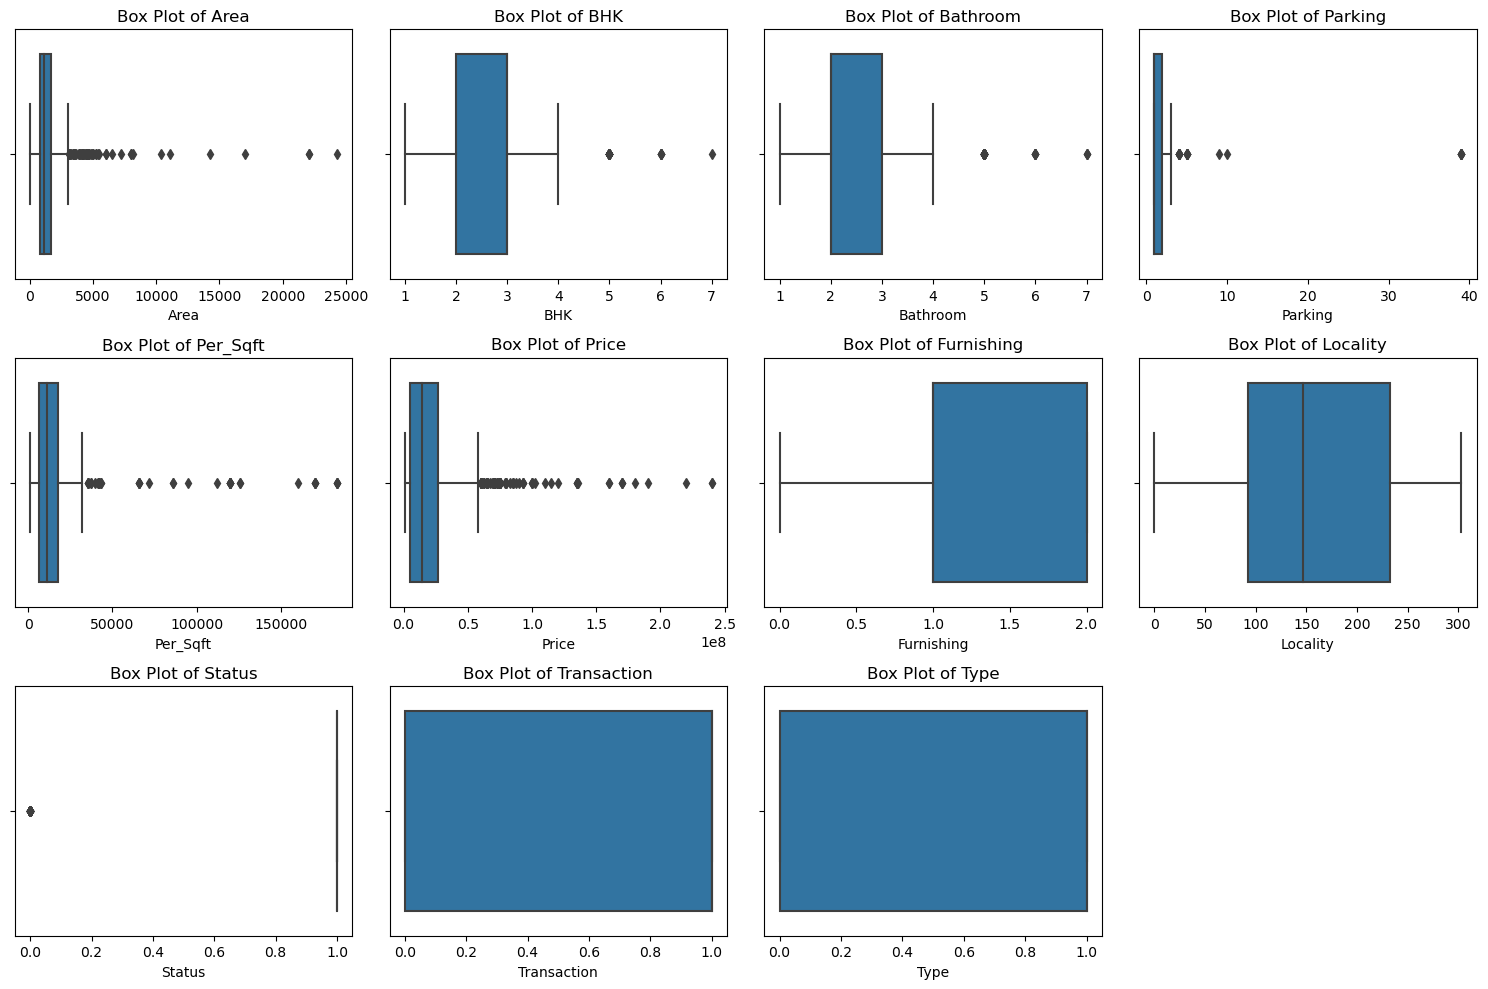

In [9]:
features_to_plot = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price', 
                    'Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

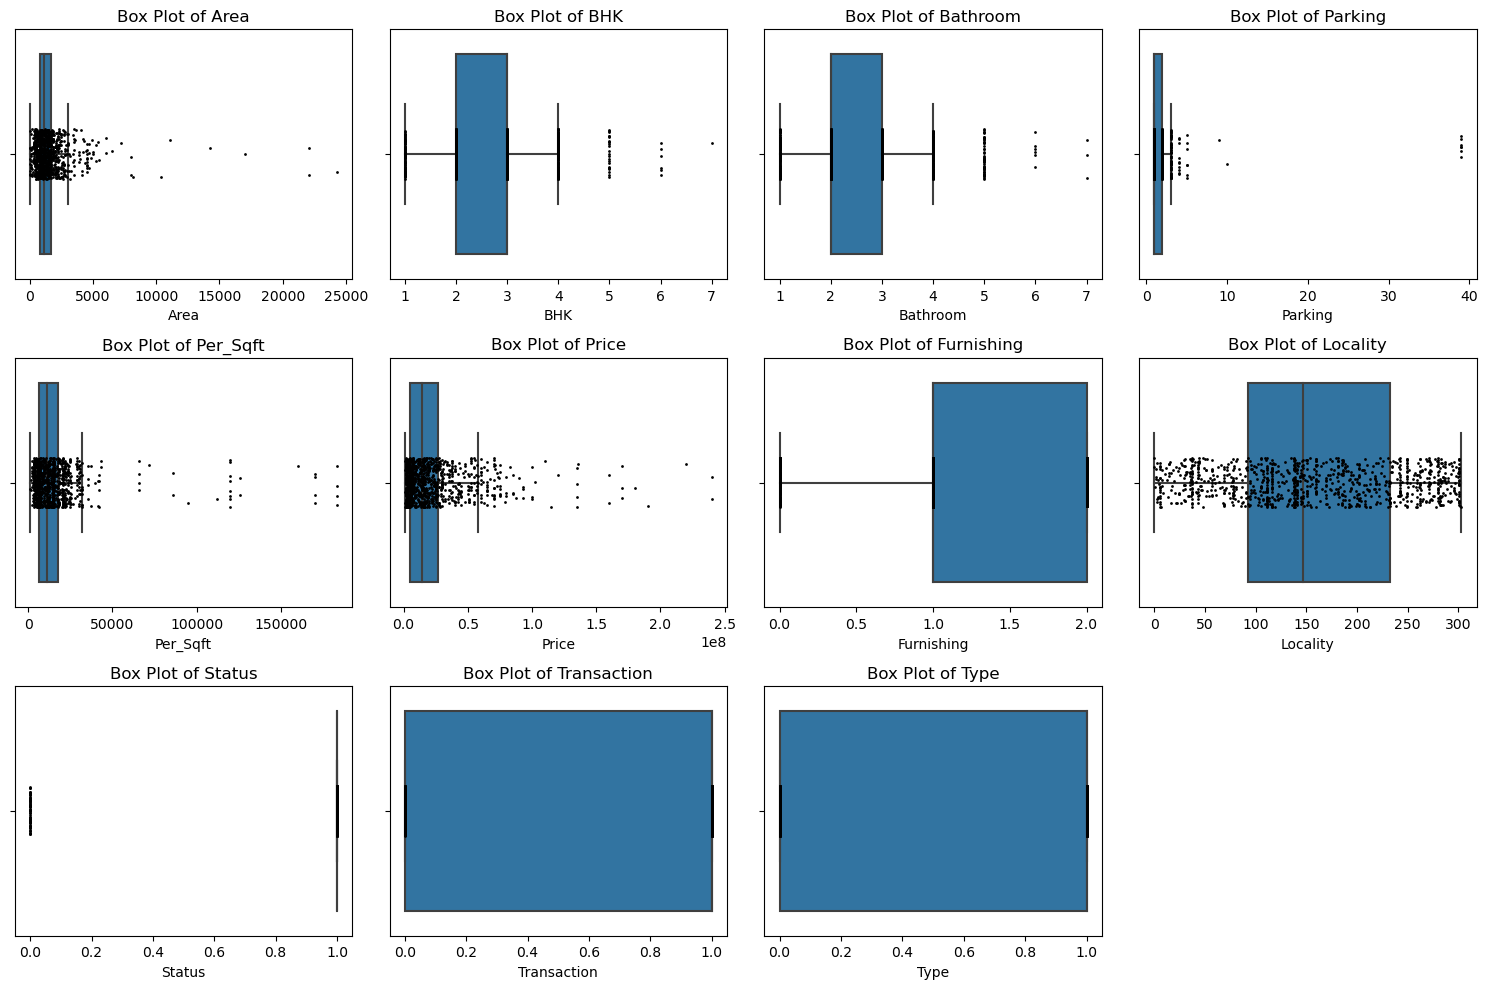

In [10]:
features_to_plot = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price', 
                    'Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[feature], showfliers=False)  
    sns.stripplot(x=data[feature], color='black', size=2, jitter=True) 
    plt.title(f'Box Plot of {feature}')
for j in range(len(features_to_plot) + 1, 13):
    plt.delaxes(plt.subplot(3, 4, j))
plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import zscore

attributes_to_process = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price']

thresholds = {'Area': 5, 'BHK': 3, 'Bathroom': 2, 'Parking': 3, 'Per_Sqft': 2, 'Price': 5}

for attribute in attributes_to_process:
    threshold = thresholds[attribute]
    
    z_scores = zscore(data[attribute])
    
    outliers = abs(z_scores) > threshold
    
    data.loc[outliers, attribute] = data[attribute].median()

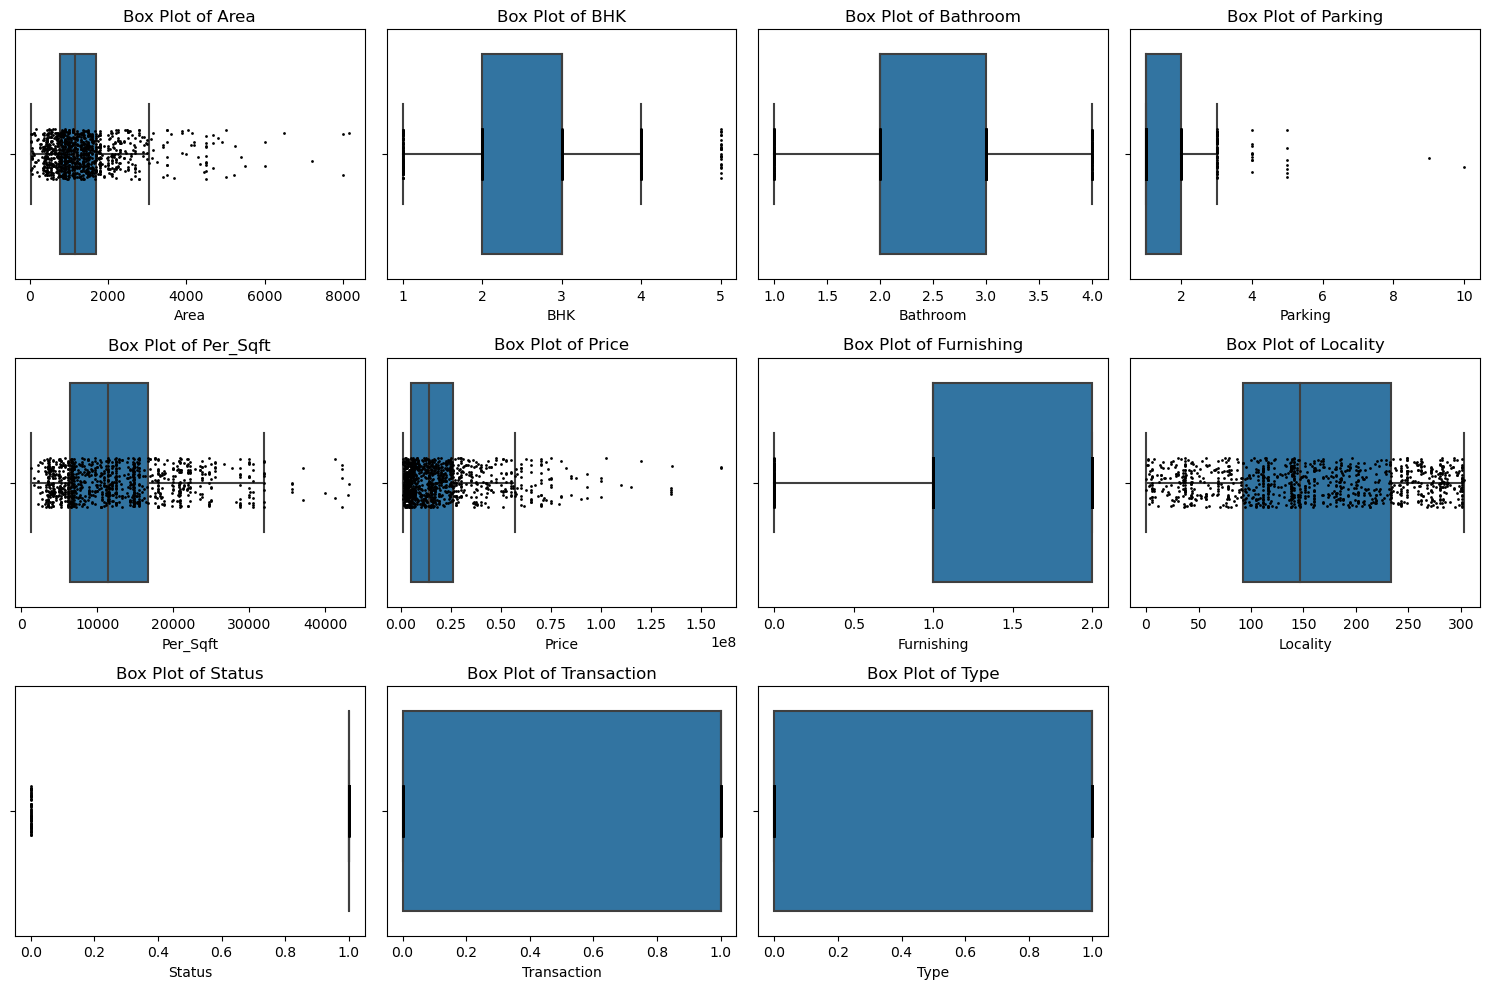

In [12]:
features_to_plot = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price', 
                    'Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[feature], showfliers=False)  
    sns.stripplot(x=data[feature], color='black', size=2, jitter=True) 
    plt.title(f'Box Plot of {feature}')
for j in range(len(features_to_plot) + 1, 13):
    plt.delaxes(plt.subplot(3, 4, j))
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('Price',axis=1),data['Price'],test_size=0.2,random_state=2)

In [14]:
x_train

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
212,950.0,3,2.0,0,284,1.0,1,0,0,4600.0
860,565.0,2,2.0,2,149,1.0,1,1,1,5820.0
528,100.0,3,2.0,2,90,1.0,1,1,1,6667.0
429,1530.0,3,3.0,1,200,2.0,1,1,1,7500.0
237,700.0,2,2.0,1,125,1.0,1,0,1,18750.0
...,...,...,...,...,...,...,...,...,...,...
614,960.0,2,2.0,1,176,2.0,1,1,0,14722.0
701,1400.0,3,3.0,0,174,1.0,1,1,0,12500.0
565,2000.0,4,3.0,1,249,1.0,1,1,0,12500.0
607,405.0,1,1.0,1,59,1.0,1,1,0,14722.0


In [15]:
y_train

212     4370000
860     3500000
528     5500000
429    26500000
237     2400000
         ...   
614    13000000
701    18000000
565    25000000
607     4500000
205    10000000
Name: Price, Length: 804, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [17]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
rfr.score(x_train,y_train)

0.9613450039411053

In [19]:
r_pred=rfr.predict(x_test)

In [20]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':r_pred})
dfr.reset_index(drop=True,inplace=True)
dfr.head(10)

,Actual,Predicted
0,31500000,28838000.0
1,23500000,36540000.0
2,24000000,16595000.0
3,31000000,38581000.0
4,27500000,21958000.0
5,3500000,2208900.0
6,29000000,28491000.0
7,1900000,8151000.0
8,18500000,17627000.0
9,3300000,4882400.0


C:\Users\ritod\AppData\Local\Temp\ipykernel_20928\376180408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dfr['Actual'],color='red',hist=False,label='Actual_Price')
C:\Users\ritod\AppData\Local\Temp\ipykernel_20928\376180408.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

<Axes: ylabel='Density'>

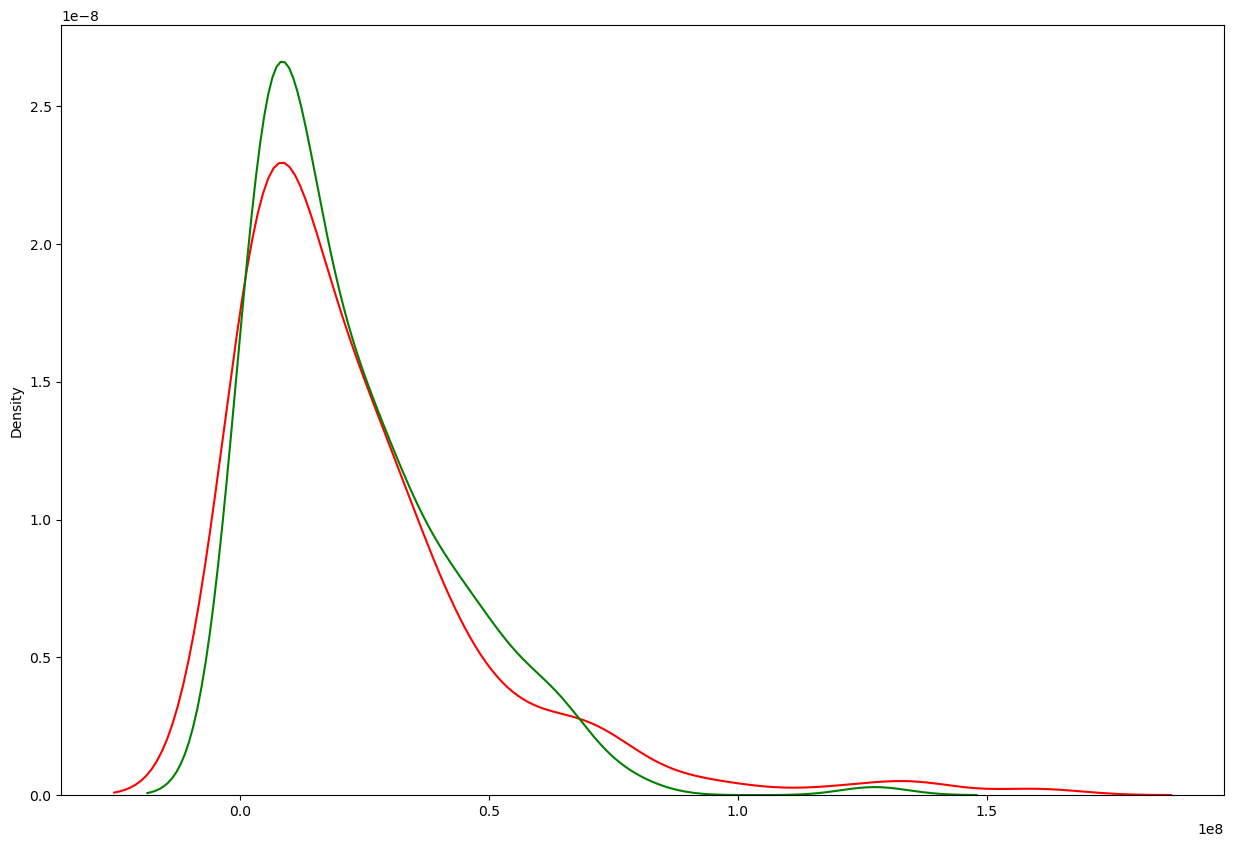

In [21]:
plt.figure(figsize=(15,10))
sns.distplot(x=dfr['Actual'],color='red',hist=False,label='Actual_Price')
sns.distplot(x=dfr['Predicted'],color='green',hist=False,label='Predicted_Price')